# Data Loading and Preprocessing

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the train and test datasets with 'PassengerId' as index
train_data = pd.read_csv(r"C:\Users\medam\OneDrive\Bureau\Codsoft\Titanic - Machine Learning from Disaster/train.csv", index_col='PassengerId')
test_data = pd.read_csv(r"C:\Users\medam\OneDrive\Bureau\Codsoft\Titanic - Machine Learning from Disaster/test.csv", index_col='PassengerId')

# Handle missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
for col in ['Sex', 'Embarked']:
    train_data[col] = label_encoder.fit_transform(train_data[col])
    test_data[col] = label_encoder.transform(test_data[col])

# Feature engineering: Create a new feature 'FamilySize'
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch']


# Model Training and Evaluation

Accuracy: 0.8268156424581006
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       110
           1       0.81      0.72      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



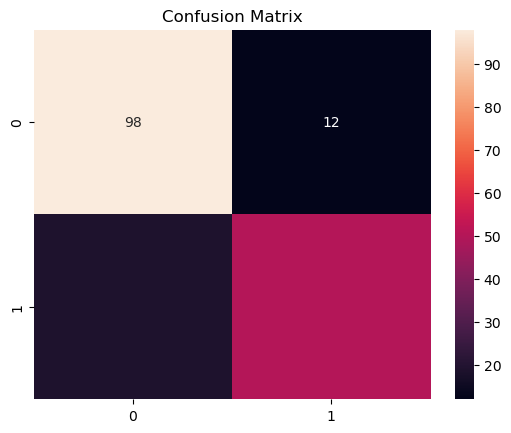

Cross-Validation Scores: [0.79888268 0.80337079 0.85393258 0.79213483 0.83707865]
Mean CV Accuracy: 0.8170799070993662


In [2]:
# Feature selection
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize']
X = train_data[features]
y = train_data['Survived']

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

# Model selection and training: Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_valid)
print("Accuracy:", accuracy_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))
sns.heatmap(confusion_matrix(y_valid, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

# Cross-validation to assess model performance
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


# Visualizations

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


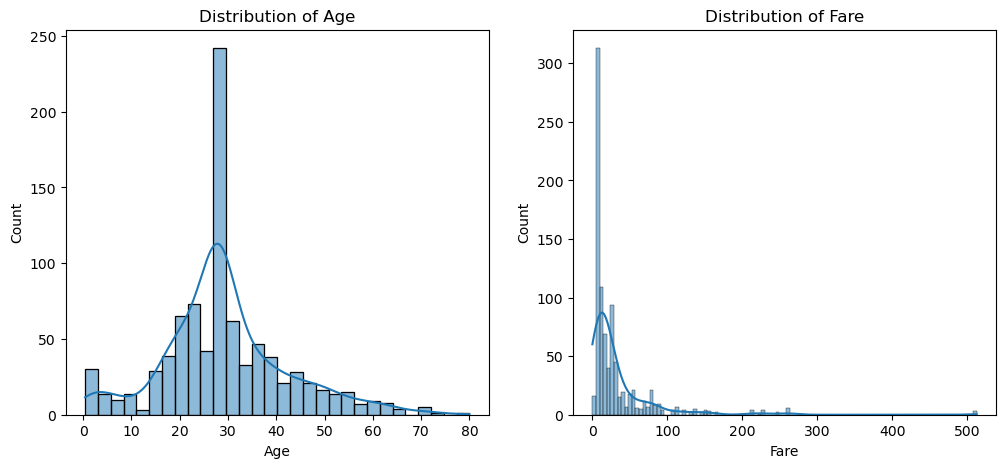

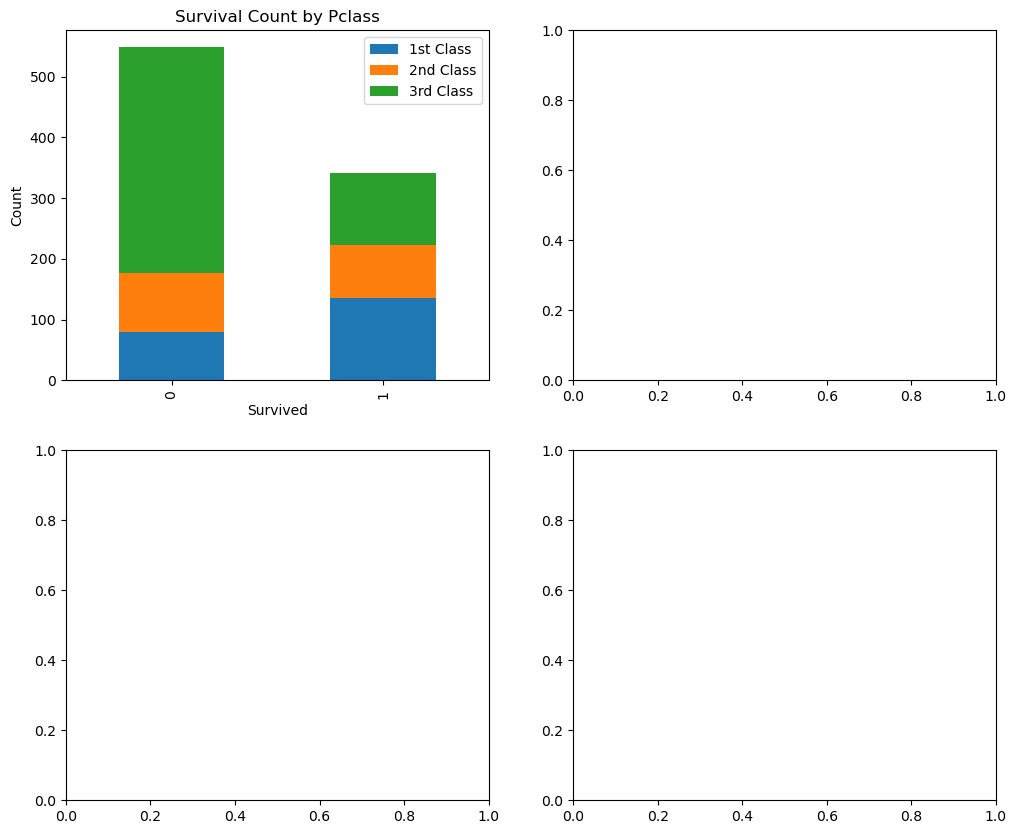

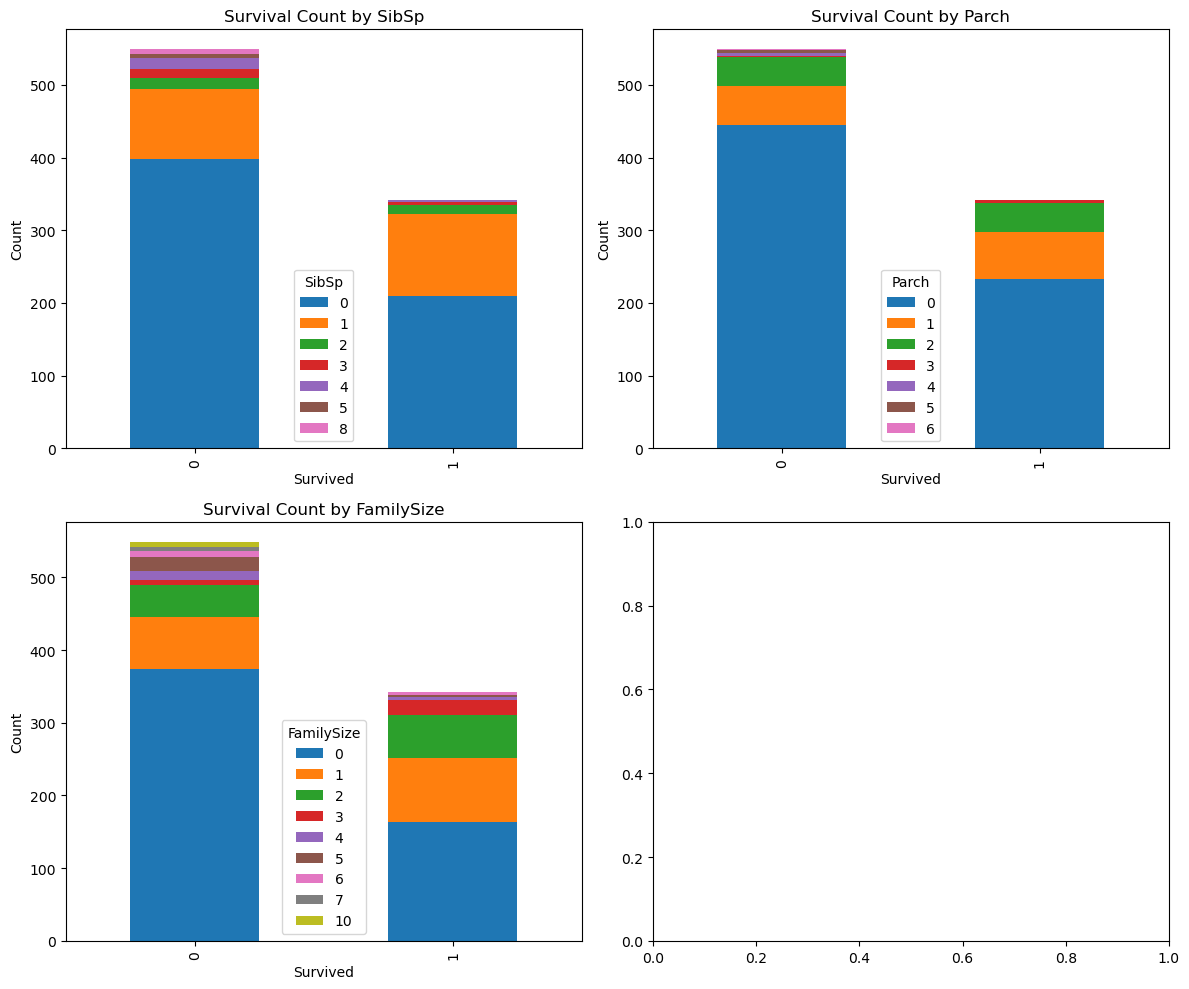

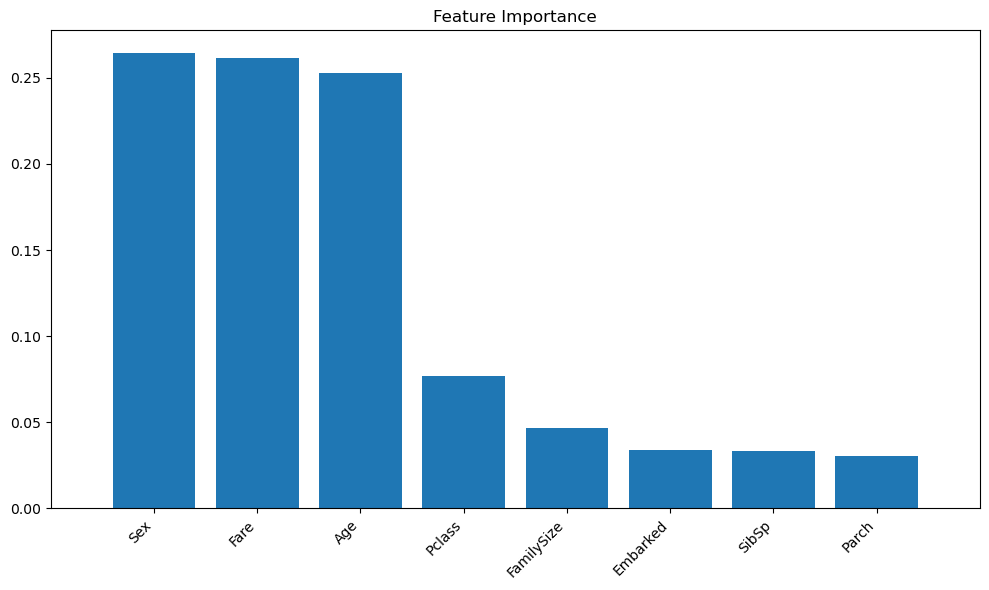

In [3]:
# Visualize the distribution of Age and Fare
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(train_data['Age'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Age')

sns.histplot(train_data['Fare'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Fare')
plt.show()

# Count the number of survivors by Pclass, SibSp, Parch, and FamilySize
survived_count_pclass = train_data.groupby(['Survived', 'Pclass']).size().unstack()
survived_count_sibsp = train_data.groupby(['Survived', 'SibSp']).size().unstack()
survived_count_parch = train_data.groupby(['Survived', 'Parch']).size().unstack()
survived_count_familysize = train_data.groupby(['Survived', 'FamilySize']).size().unstack()

# Plot the count of survivors by Pclass, SibSp, Parch, and FamilySize
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
survived_count_pclass.plot(kind='bar', stacked=True, ax=axes[0, 0])
axes[0, 0].set_title('Survival Count by Pclass')
axes[0, 0].set_xlabel('Survived')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(['1st Class', '2nd Class', '3rd Class'], loc='upper right')

# Similar plots for SibSp, Parch, and FamilySize
# Count the number of survivors by SibSp, Parch, and FamilySize
survived_count_sibsp = train_data.groupby(['Survived', 'SibSp']).size().unstack()
survived_count_parch = train_data.groupby(['Survived', 'Parch']).size().unstack()
survived_count_familysize = train_data.groupby(['Survived', 'FamilySize']).size().unstack()

# Plot the count of survivors by SibSp, Parch, and FamilySize
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

survived_count_sibsp.plot(kind='bar', stacked=True, ax=axes[0, 0])
axes[0, 0].set_title('Survival Count by SibSp')
axes[0, 0].set_xlabel('Survived')
axes[0, 0].set_ylabel('Count')

survived_count_parch.plot(kind='bar', stacked=True, ax=axes[0, 1])
axes[0, 1].set_title('Survival Count by Parch')
axes[0, 1].set_xlabel('Survived')
axes[0, 1].set_ylabel('Count')

survived_count_familysize.plot(kind='bar', stacked=True, ax=axes[1, 0])
axes[1, 0].set_title('Survival Count by FamilySize')
axes[1, 0].set_xlabel('Survived')
axes[1, 0].set_ylabel('Count')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# Feature Importance Analysis
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45, ha='right')
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()


# Predictions and Submission

In [4]:
# Generate predictions for the test dataset
test_predictions = model.predict(test_data[features])

# Prepare submission file
submission = pd.DataFrame({'PassengerId': test_data.index, 'Survived': test_predictions})
submission.to_csv('submission.csv', index=False)
